In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/Mall_Customers.csv")
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


1. Data analysing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Outliers detection

In [11]:
ncols=df.select_dtypes(include='int')
ncols.tail()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18
199,200,30,137,83


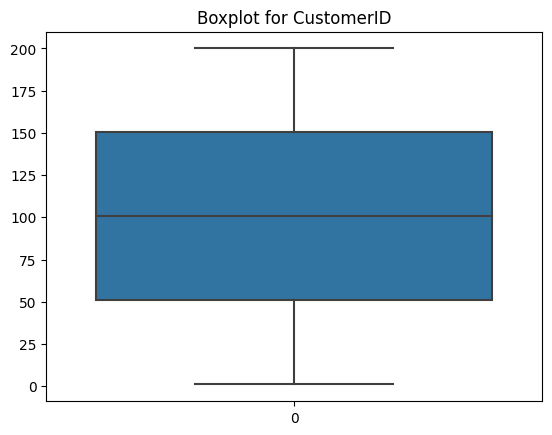

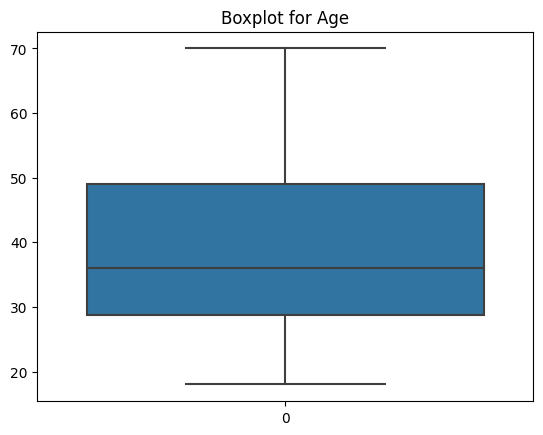

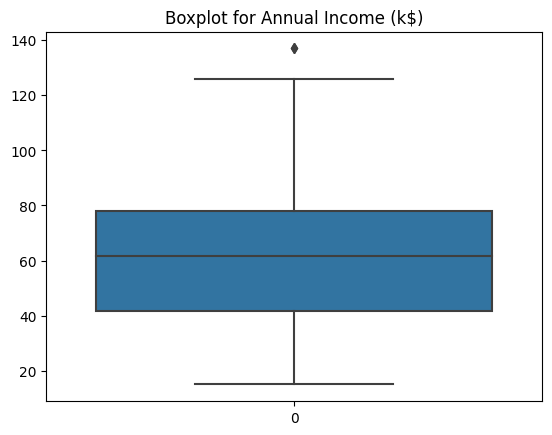

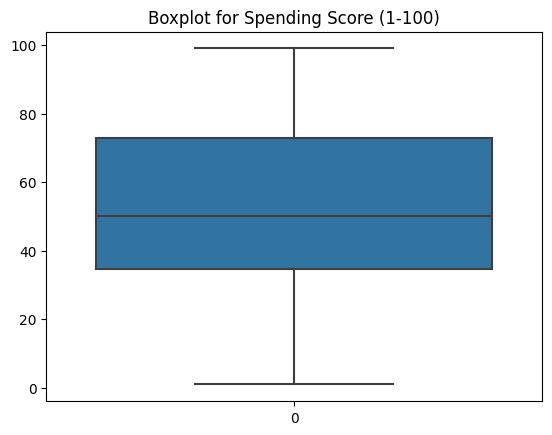

In [10]:
for i in ncols:
    sns.boxplot(df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

label encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Genre']= le.fit_transform(df["Genre"])
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18
199,200,1,30,137,83


scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df=pd.DataFrame(sc.fit_transform(df),columns=df.columns)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.008197,0.051020
3,0.015075,0.0,0.096154,0.008197,0.775510
4,0.020101,0.0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.860656,0.795918
196,0.984925,0.0,0.519231,0.909836,0.275510
197,0.989950,1.0,0.269231,0.909836,0.744898
198,0.994975,1.0,0.269231,1.000000,0.173469


k means

In [15]:
from sklearn import cluster
error=[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters =i,init='k-means++',random_state=0)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

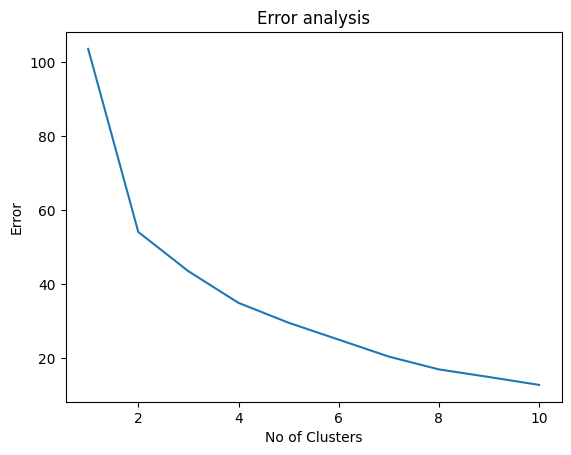

In [18]:
plt.plot(range(1,11),error)
plt.title('Error analysis')
plt.xlabel('No of Clusters')
plt.ylabel('Error')
plt.show()

knn model

In [19]:
knn_model=cluster.KMeans(n_clusters =5,init='k-means++',random_state=0)
knn_model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [21]:
pred_class=knn_model.predict(df)
pred_class

array([0, 0, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 0, 0, 2, 0, 4, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 2, 4, 2, 4, 0, 2, 2, 2, 2, 2, 2, 2, 0, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 4, 0, 2, 2, 4, 0,
       2, 2, 0, 2, 4, 2, 2, 2, 4, 0, 2, 0, 2, 2, 4, 0, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 0, 4, 2, 2, 0, 2, 2, 4, 0, 1, 2, 4, 0, 4, 1, 2, 4, 4, 4,
       4, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 4, 3, 3, 3,
       1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 1,
       1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1,
       3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3,
       3, 3], dtype=int32)

In [24]:
knn_model.predict([[1,2,4,4,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)